# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from google.colab import files

# Loading the dataset and learning the data

In [2]:
uploaded = files.upload()

Saving Airline_Delay_Cause.csv to Airline_Delay_Cause (7).csv


In [3]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [5]:
df.tail(1)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171665,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(171666, 21)

In [7]:
df.size

3604986

In [8]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Datatype and descriptive stats

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [10]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [11]:
df.describe(include = 'all')

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171666,171666,171666,171666,171426.000000,171223.000000,171426.000000,171426.000000,...,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
unique,NaN,NaN,21,23,395,419,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25593,25593,1535,1535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018.551361,6.493633,NaN,NaN,NaN,NaN,362.528467,66.434387,20.796615,2.250347,...,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,NaN,NaN,NaN,NaN,992.894662,179.540694,50.315176,7.314252,...,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,NaN,NaN,NaN,NaN,50.000000,6.000000,2.160000,0.000000,...,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,NaN,NaN,NaN,NaN,100.000000,17.000000,6.400000,0.400000,...,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,250.000000,47.000000,17.260000,1.860000,...,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000


# Checking for missing values and cleaning the data

In [12]:
mv = df.isnull().sum()
mp = (mv / len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing Values :' : mv, 'Missing Percent : ' : mp})
data

,Missing Values :,Missing Percent :
year,0,0.00
month,0,0.00
carrier,0,0.00
carrier_name,0,0.00
airport,0,0.00
airport_name,0,0.00
arr_flights,240,0.14
arr_del15,443,0.26
carrier_ct,240,0.14
weather_ct,240,0.14


# Filling the nan values using Simple Imputer

In [13]:
si = SimpleImputer(strategy = 'mean')
col = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']
for i in col:
  df[i] = si.fit_transform(df[[i]])

In [14]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Correlation Analysis

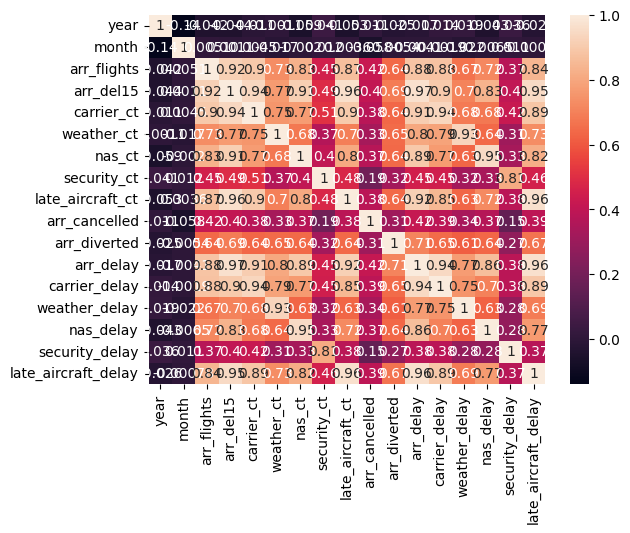

In [15]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

# Splitting leaky columns and non leaky columns

In [16]:
leaky_direct = [
    'arr_delay',
    'arr_del15',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]

leaky_post_flight = [
    'arr_cancelled',
    'arr_diverted',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'security_ct',
    'late_aircraft_ct'
]

leaky_metadata = [
    'carrier_name',
    'airport_name'
]

leaky_data = leaky_direct + leaky_post_flight + leaky_metadata


In [61]:
non_leaky_data = ['year', 'month', 'carrier', 'airport', 'arr_flights']


# Checking for outliers in non leaky data and target

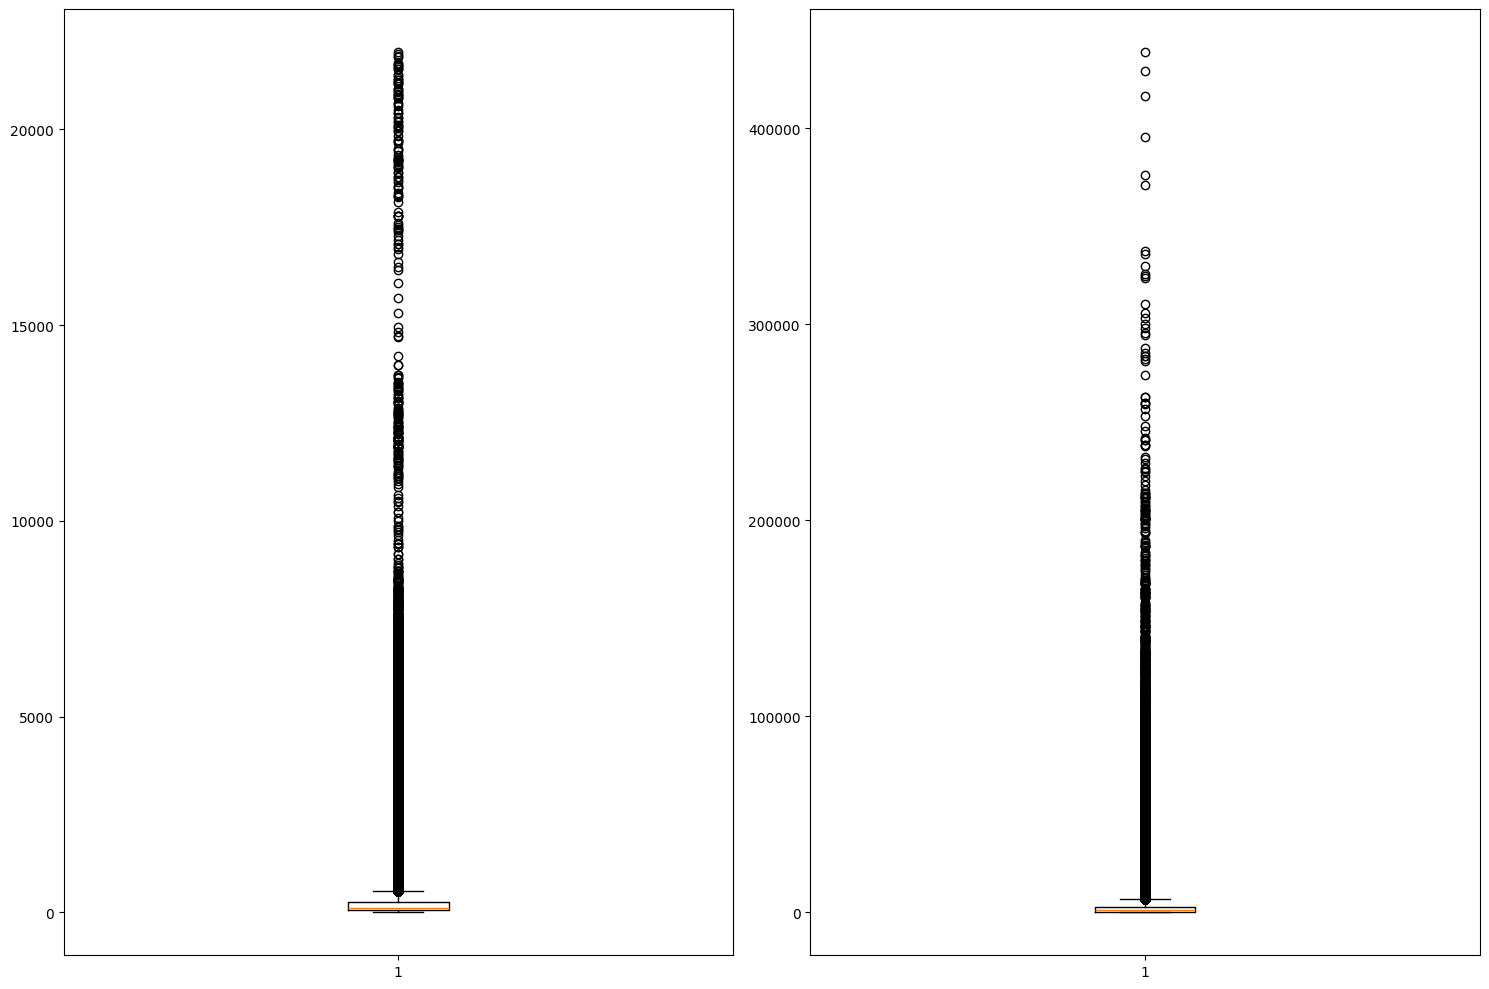

In [39]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.boxplot(df['arr_flights'])
plt.subplot(1, 2, 2)
plt.boxplot(df['arr_delay'])
plt.tight_layout()
plt.show()

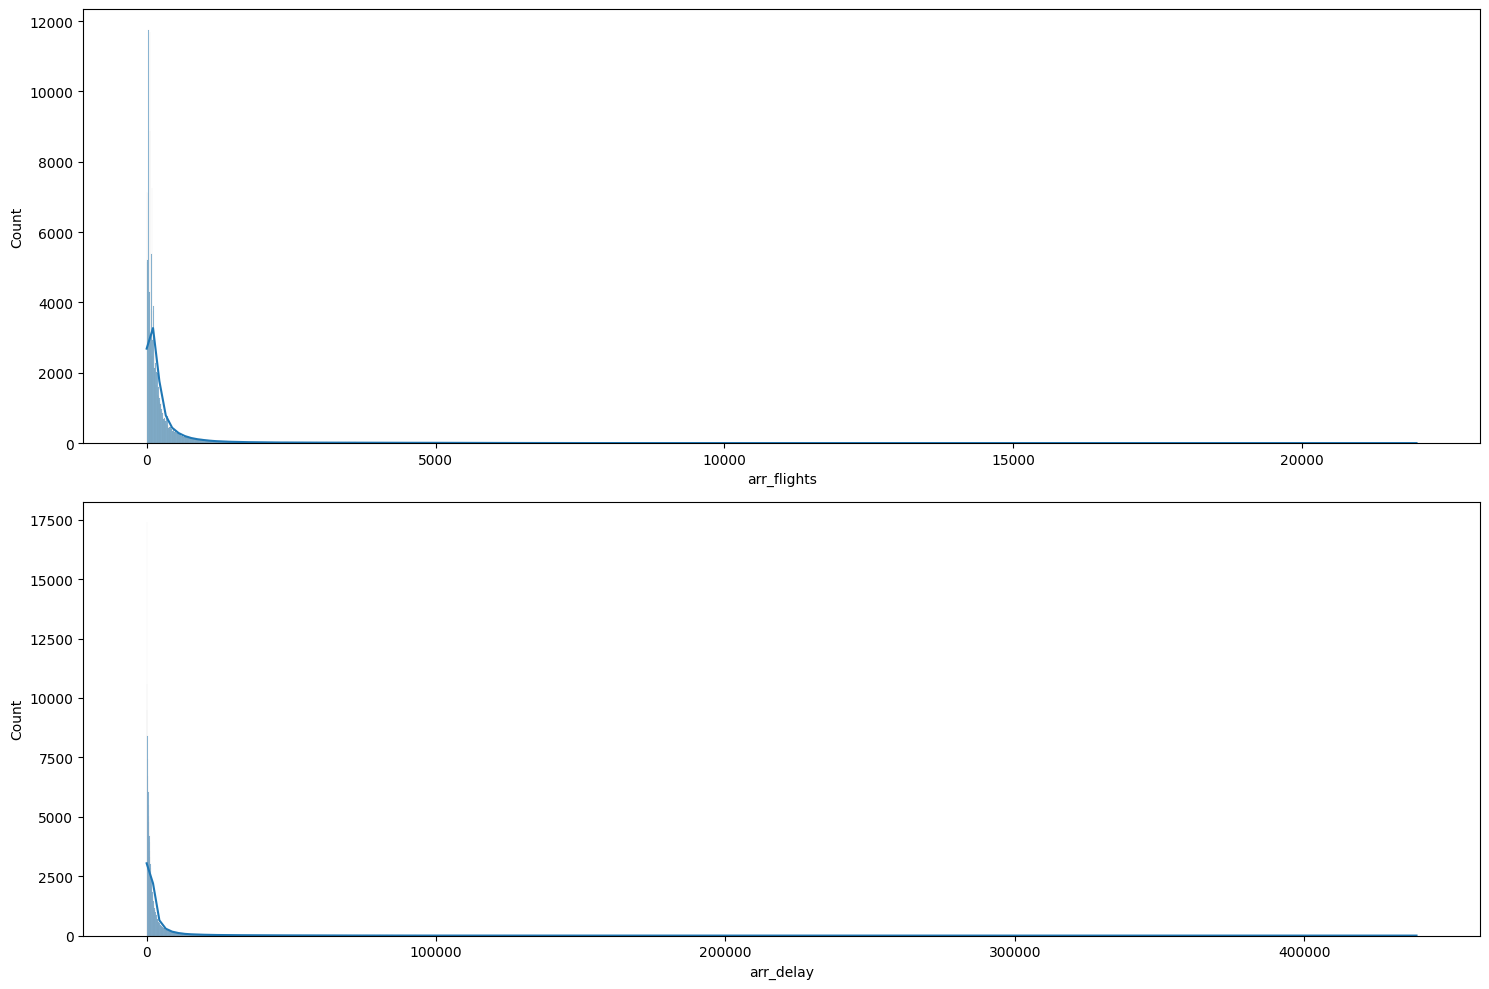

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.histplot(df['arr_flights'], kde = True)
plt.subplot(2, 1, 2)
sns.histplot(df['arr_delay'], kde = True)
plt.tight_layout()
plt.show()

In [48]:
numeric_cols = ['arr_flights', 'arr_delay']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col} — Number of outliers: {outliers.shape[0]}")




arr_flights — Number of outliers: 21570

arr_delay — Number of outliers: 21022


 # Outliers in columns like 'arr_flights' were retained because they reflect real-world scenarios such as high traffic or extreme delays. Instead of removing them, transformations like log1p will be used to reduce their influence on the model while preserving important information.

# Base model

In [107]:
scaler = StandardScaler()
df[['arr_flights']] = scaler.fit_transform(df[['arr_flights']])

In [116]:
X = df[['year', 'month', 'carrier', 'airport', 'arr_flights']]
y = np.log1p(df['arr_delay'])

In [117]:
X = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = model.predict(X_test)

In [121]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [122]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 2.8238751682626617
Root Mean Squared Error: 1.6804389808209823
R-squared Score: 0.35133326997464753


In [123]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.3666194832076425, 0.35133326997464753)

In [124]:
error = y_test - y_pred
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error' : error
})
comparison_df = comparison_df.round(2)
comparison_df.head(10)

,Actual,Predicted,Error
4739,5.55,5.33,0.21
146047,7.41,7.45,-0.04
25700,8.15,7.84,0.32
123710,6.46,6.86,-0.40
39508,3.99,6.32,-2.33
32145,6.57,6.51,0.06
27166,6.42,6.15,0.27
27607,7.98,6.44,1.55
22636,7.00,6.87,0.13
166759,8.02,7.20,0.82


# Ridge regression

In [126]:
X1 = df[['year', 'month', 'carrier', 'airport', 'arr_flights']]
y1 = np.log1p(df['arr_delay'])

In [127]:
X1 = pd.get_dummies(X1, columns=['carrier', 'airport'], drop_first=True)


In [128]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [129]:
from sklearn.linear_model import Ridge, Lasso

In [130]:
ridge = Ridge(alpha=1.0)
ridge.fit(X1_train, y1_train)

Ridge()

In [131]:
y_pred1 = ridge.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_pred1)
r21 = r2_score(y1_test, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y1_test, y_pred1))

In [132]:
print("MSE:", mse1)
print('RMSE:',rmse1)
print("R2:", r21)

MSE: 2.823337630283927
RMSE: 1.6802790334595998
R2: 0.3514567467511174


In [133]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.3665954103848176, 0.3514567467511174)

In [134]:
error = y1_test - y_pred1
comparison_df = pd.DataFrame({
    'Actual': y1_test,
    'Predicted': y_pred1,
    'Error' : error
})
comparison_df = comparison_df.round(2)
comparison_df.head(10)

,Actual,Predicted,Error
4739,5.55,5.33,0.21
146047,7.41,7.44,-0.03
25700,8.15,7.84,0.32
123710,6.46,6.86,-0.40
39508,3.99,6.32,-2.33
32145,6.57,6.51,0.06
27166,6.42,6.15,0.27
27607,7.98,6.44,1.55
22636,7.00,6.87,0.13
166759,8.02,7.20,0.82


# Lasso Regression

In [135]:
X2 = df[['year', 'month', 'carrier', 'airport', 'arr_flights']]
y2 = np.log1p(df['arr_delay'])

In [136]:
X2 = pd.get_dummies(X2, columns=['carrier', 'airport'], drop_first=True)


In [137]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [138]:
lasso = Lasso(alpha=0.1)
lasso.fit(X2_train, y2_train)

Lasso(alpha=0.1)

In [139]:
y_pred2 = lasso.predict(X2_test)
mse2 = mean_squared_error(y2_test, y_pred2)
r22 = r2_score(y2_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y2_test, y_pred2))

In [140]:
print("MSE:", mse2)
print('RMSE:',rmse1)
print("R2:", r22)

MSE: 3.4303337676880394
RMSE: 1.6802790334595998
R2: 0.21202487525299252


In [141]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.22425641053059509, 0.21202487525299252)

In [142]:
error = y2_test - y_pred2
comparison_df = pd.DataFrame({
    'Actual': y2_test,
    'Predicted': y_pred2,
    'Error' : error
})
comparison_df = comparison_df.round(2)
comparison_df.head(10)

,Actual,Predicted,Error
4739,5.55,6.30,-0.76
146047,7.41,6.64,0.78
25700,8.15,6.48,1.67
123710,6.46,6.57,-0.11
39508,3.99,6.36,-2.38
32145,6.57,6.33,0.24
27166,6.42,6.34,0.08
27607,7.98,6.61,1.37
22636,7.00,6.33,0.67
166759,8.02,6.86,1.16


# In this analysis, a linear regression model was applied to predict flight arrival delays (arr_delay) based on features such as year, month, carrier, airport, and number of arrival flights (arr_flights). To address the strong right-skewness and outliers in the target variable, a logarithmic transformation (log1p) was applied to the delay values, and feature scaling was performed where appropriate.

# The model achieved a moderate R-squared value (~0.35) on the log-transformed target, indicating it can explain some but not all of the variance in arrival delays. Despite scaling and transformation efforts, the linear regression model struggled to capture the complexity of the delay patterns, likely due to the presence of extreme outliers and non-linear relationships inherent in the data.

# The relatively high prediction error and limited explanatory power suggest that flight delay is influenced by complex, non-linear factors that are not well modeled by a simple linear approach. Therefore, exploring non-linear models such as decision trees, random forests, or gradient boosting methods is a recommended next step to better capture the underlying patterns and improve predictive performance.